In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_frame = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data_frame.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
365,1010-DIAUQ,Male,0,No,No,5,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),96.50,492.55,Yes
2952,5260-UMPWX,Female,0,Yes,Yes,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.25,493.95,No
1714,8932-CZHRQ,Male,0,No,No,68,Yes,Yes,DSL,Yes,...,Yes,No,No,Yes,One year,No,Credit card (automatic),76.75,5233.25,No
3489,0975-UYDTX,Female,0,Yes,No,26,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),90.10,2312.55,No
5279,0394-YONDK,Male,0,Yes,Yes,70,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.15,1790.15,No


In [3]:
data_frame.shape

(7043, 21)

Data Cleanup

In [4]:
data_frame.drop(['customerID'],axis = 'columns',inplace = True)

In [5]:
data_frame.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data_frame.TotalCharges.values
#TotalCharges contain Strings

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
data_frame[pd.to_numeric(data_frame.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
data_frame[pd.to_numeric(data_frame.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [9]:
#For Droping null vales from data_frame.TotalCharges
df1 = data_frame[data_frame.TotalCharges != ' ']

In [10]:
df1.shape

(7032, 20)

In [11]:
#To convert String into numeric
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [13]:
df1.TotalCharges.dtypes

dtype('float64')

In [14]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4561,Female,0,Yes,Yes,8,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,55.75,446.80,No
367,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.15,19.15,No
419,Female,1,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.30,75.30,Yes
2204,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,111.30,7482.10,Yes
3398,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),100.70,6018.65,No


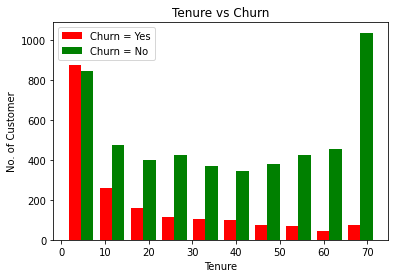

In [15]:
tenure_churn_No = df1[df1.Churn == 'No'].tenure
tenure_churn_Yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("No. of Customer")
plt.title("Tenure vs Churn")

plt.hist([tenure_churn_Yes,tenure_churn_No],color=['red','green'],label=["Churn = Yes","Churn = No"])
plt.legend()

In [16]:
def Print_Unique_val(df1):
    for column in df1:
        if df1[column].dtypes == 'object':
            print(f'{column} : {df1[column].unique()}')

In [17]:
Print_Unique_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
df1.replace("No internet service","No",inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
df1.replace("No phone service","No",inplace = True)

In [20]:
Print_Unique_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
df1.replace({'Yes':1,'No':0},inplace=True)

In [22]:
df1.gender.replace({'Male':1,'Female':0},inplace= True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [24]:
df2 = pd.get_dummies(data = df1,columns=['InternetService','Contract','PaymentMethod'])

In [25]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_0 : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [26]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [27]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6094,1,0,0,0,57,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5262,0,0,0,0,59,1,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1604,1,0,1,1,69,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1404,0,0,0,0,35,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
5097,1,0,0,0,35,1,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1


In [28]:
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scale = MinMaxScaler()
df2[columns_to_scale] = scale.fit_transform(df2[columns_to_scale])

In [29]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4845,1,0,1,1,0.267606,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
3701,0,0,1,1,0.366197,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
6521,0,0,1,1,0.239437,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


Model Training

In [30]:
x = df2.drop(['Churn'],axis = 'columns')
y = df2['Churn']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [32]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train,y_train,epochs=75)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/75
176/176 [==============================] - 1s 2ms/step - loss: 0.5395 - accuracy: 0.7282
Epoch 2/75
176/176 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7897
Epoch 3/75
176/176 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.7957
Epoch 4/75
176/176 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.7991
Epoch 5/75
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7988
Epoch 6/75
176/176 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.7979
Epoch 7/75
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8007
Epoch 8/75
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8020
Epoch 9/75
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8020
Epoch 10/75
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8014

In [33]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8109


[0.4203605651855469, 0.8109452724456787]

In [34]:
yp = model.predict(x_test)

In [35]:
yp[:10]

array([[0.23362163],
       [0.15200755],
       [0.843941  ],
       [0.02880129],
       [0.01808739],
       [0.09697413],
       [0.02642292],
       [0.08927539],
       [0.8361568 ],
       [0.08259276]], dtype=float32)

In [36]:
y_test[:10]

6185    0
5215    1
2400    0
3354    0
3039    0
6197    1
2044    0
6852    0
3325    1
595     1
Name: Churn, dtype: int64

In [37]:
y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

In [39]:
y_test[:10]

6185    0
5215    1
2400    0
3354    0
3039    0
6197    1
2044    0
6852    0
3325    1
595     1
Name: Churn, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1040
           1       0.68      0.51      0.58       367

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



Text(69.0, 0.5, 'Truth')

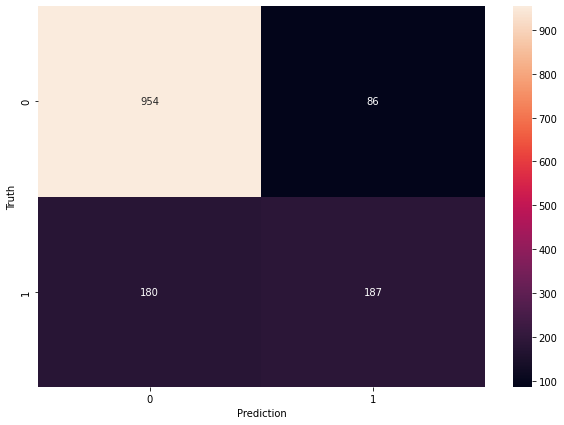

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")